# Preprocessing images and video
This notebook demonstrates the results of preprocessing for various devices on using images and video from the [CIRS 040GSE](https://www.cirsinc.com/products/ultrasound/zerdine-hydrogel/multi-purpose-multi-tisse-ultrasound-phantom/) phantom.

## Butterfly
Below shows results for the Butterfly iQ (note, there's a new Butterfly iQ+).  Note, the orientation mark is still visible in the output image as it is too large to median filter.  Possible solutions are a more advanced in-filling procedure than the median filter used or cropping the image.

orig_img: 
	type: <class 'itk.itkImagePython.itkImageRGBUC2'>, 
	spacing: itkVectorD2 ([1, 1]), 
	size: itkSize2 ([1928, 1080]), 
	min/max RGB value: 0, 255
new_img: 
	type: <class 'itk.itkImagePython.itkImageF2'>, 
	spacing: itkVectorD2 ([0.047619, 0.047619]), 
	size: itkSize2 ([693, 994]), 
	min/max value: 0.0, 1.0, 
	meta: {'spacing': array([0.04761905, 0.04761905]), 'crop': array([[  54, 1048],
       [ 614, 1307]])}


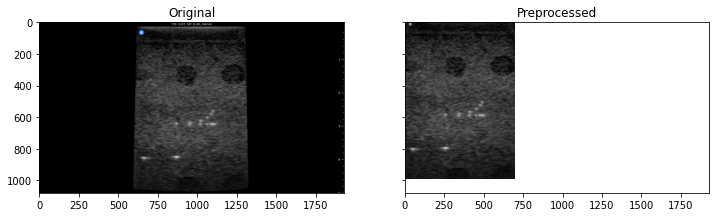

In [1]:
import itk
import matplotlib.pyplot as plt
import itkpocus.butterfly as butterfly
import numpy as np

fp = '../tests/data/butterfly_axial-lateral-resolution-2020.png'
orig_img = itk.imread(fp)
new_img, meta = butterfly.load_and_preprocess_image(fp)

fig, axs = plt.subplots(1,2, sharex=True, sharey=True, figsize=(12,10))

axs[1].imshow(new_img, cmap='gray')
axs[1].title.set_text('Preprocessed')
axs[0].imshow(orig_img) # since this is the bigger image, have to plot it last for sharex/y to work
axs[0].title.set_text('Original')
#fig.axes.set_aspect('equal')
print('orig_img: \n\ttype: {}, \n\tspacing: {}, \n\tsize: {}, \n\tmin/max RGB value: {}, {}'.format(
    str(type(orig_img)),
    str(orig_img.GetSpacing()),
    str(orig_img.GetLargestPossibleRegion().GetSize()),
    np.min(itk.array_from_image(orig_img)), np.max(itk.array_from_image(orig_img)))
)

print('new_img: \n\ttype: {}, \n\tspacing: {}, \n\tsize: {}, \n\tmin/max value: {}, {}, \n\tmeta: {}'.format(
    str(type(new_img)),
    str(new_img.GetSpacing()),
    str(new_img.GetLargestPossibleRegion().GetSize()),
    np.min(itk.array_from_image(new_img)), np.max(itk.array_from_image(new_img)),
    str(meta))
)

## Clarius

orig_img: 
	type: <class 'itk.itkImagePython.itkImageRGBUC2'>, 
	spacing: itkVectorD2 ([1, 1]), 
	size: itkSize2 ([1280, 960]), 
	min/max RGB value: 0, 247
new_img: 
	type: <class 'itk.itkImagePython.itkImageF2'>, 
	spacing: itkVectorD2 ([0.714286, 0.714286]), 
	size: itkSize2 ([592, 642]), 
	min/max value: 0.0, 0.9686274528503418, 
	meta: {'spacing': [0.7142857142857143, 0.7142857142857143], 'crop': array([[159, 800],
       [344, 935]], dtype=int64)}


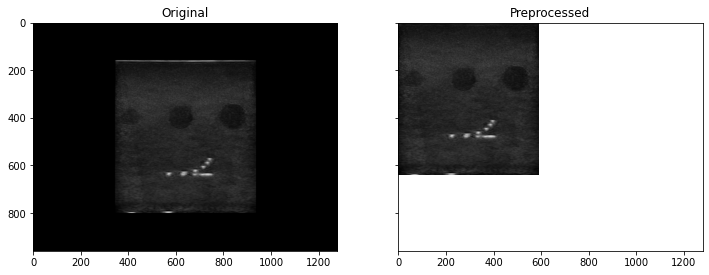

In [2]:
import itk
import matplotlib.pyplot as plt
import itkpocus.clarius as clarius
import numpy as np

fp = '../tests/data/clarius_axial-lateral-resolution-2020.png'
orig_img = itk.imread(fp)
new_img, meta = clarius.load_and_preprocess_image(fp)

fig, axs = plt.subplots(1,2, sharex=True, sharey=True, figsize=(12,10))

axs[1].imshow(new_img, cmap='gray')
axs[1].title.set_text('Preprocessed')
axs[0].imshow(orig_img) # since this is the bigger image, have to plot it last for sharex/y to work
axs[0].title.set_text('Original')
#fig.axes.set_aspect('equal')
print('orig_img: \n\ttype: {}, \n\tspacing: {}, \n\tsize: {}, \n\tmin/max RGB value: {}, {}'.format(
    str(type(orig_img)),
    str(orig_img.GetSpacing()),
    str(orig_img.GetLargestPossibleRegion().GetSize()),
    np.min(itk.array_from_image(orig_img)), np.max(itk.array_from_image(orig_img)))
)

print('new_img: \n\ttype: {}, \n\tspacing: {}, \n\tsize: {}, \n\tmin/max value: {}, {}, \n\tmeta: {}'.format(
    str(type(new_img)),
    str(new_img.GetSpacing()),
    str(new_img.GetLargestPossibleRegion().GetSize()),
    np.min(itk.array_from_image(new_img)), np.max(itk.array_from_image(new_img)),
    str(meta))
)

## Sonoque

Unknown encoding 'ISO_IR' - using default encoding instead


orig_img: 
	type: <class 'itk.itkImagePython.itkImageRGBUC3'>, 
	spacing: itkVectorD3 ([1, 1, 1]), 
	size: itkSize3 ([2083, 1455, 1]), 
	min/max RGB value: 0, 255
new_img: 
	type: <class 'itk.itkImagePython.itkImageD2'>, 
	spacing: itkVectorD2 ([0.00291, 0.00291]), 
	size: itkSize2 ([1293, 1311]), 
	min/max value: 0.0, 0.9607843137254902, 
	meta: {'spacing': (0.00291, 0.00291), 'crop': array([[  72, 1382],
       [ 395, 1687]], dtype=int64)}


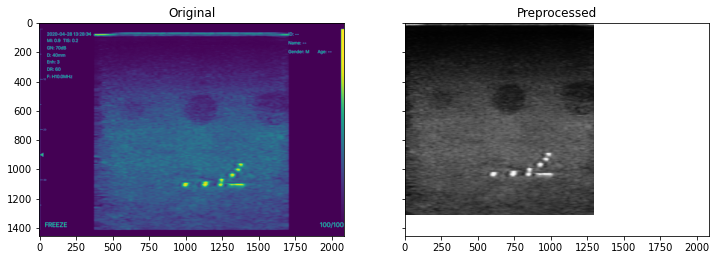

In [3]:
import itk
import matplotlib.pyplot as plt
import itkpocus.sonoque as sonoque
import numpy as np

fp = '../tests/data/sonoque_axial-lateral-resolution-2020.dcm'
orig_img = itk.imread(fp)
new_img, meta = sonoque.load_and_preprocess_image(fp)

fig, axs = plt.subplots(1,2, sharex=True, sharey=True, figsize=(12,10))

axs[1].imshow(new_img, cmap='gray')
axs[1].title.set_text('Preprocessed')
# sonoque saves as a single-image US series, so we have to remove extraneous 1-element dimensions
axs[0].imshow(itk.array_from_image(orig_img)[0,:,:,0]) # since this is the bigger image, have to plot it last for sharex/y to work
axs[0].title.set_text('Original')
#fig.axes.set_aspect('equal')
print('orig_img: \n\ttype: {}, \n\tspacing: {}, \n\tsize: {}, \n\tmin/max RGB value: {}, {}'.format(
    str(type(orig_img)),
    str(orig_img.GetSpacing()),
    str(orig_img.GetLargestPossibleRegion().GetSize()),
    np.min(itk.array_from_image(orig_img)), np.max(itk.array_from_image(orig_img)))
)

print('new_img: \n\ttype: {}, \n\tspacing: {}, \n\tsize: {}, \n\tmin/max value: {}, {}, \n\tmeta: {}'.format(
    str(type(new_img)),
    str(new_img.GetSpacing()),
    str(new_img.GetLargestPossibleRegion().GetSize()),
    np.min(itk.array_from_image(new_img)), np.max(itk.array_from_image(new_img)),
    str(meta))
)

## Interson
Coming Soon!

## Sonivate
Sonivate currently doesn't allow direct retrieval of ultrasound images from its device.  We recommend streaming the probe to Slicer and then saving from Slicer.